<a href="https://colab.research.google.com/github/viriditass/Papers/blob/main/CutMix_Regularization_Strategy_to_Train_Strong_Classifiers_with_Localizable_Features.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

# **CutMix: Regularization Strategy to Train Strong Classifiers with Localizable Features**

논문 링크: https://arxiv.org/abs/1905.04899

기존 cutout과 같은 regional dropout 기법은 NN이 특정 부분만 보고 물체를 분류하는 것을 막는 동시에 다른 데이터셋에서 보다 general할 수 있게 해준다. 하지만 이런 기법들은 학습 이미지에서 유용한 pixel들을 없애는 문제가 있다. CNN이 일반적으로 데이터가 많이 필요하므로 이는 심각한 기능적 한계가 될 수 있다.

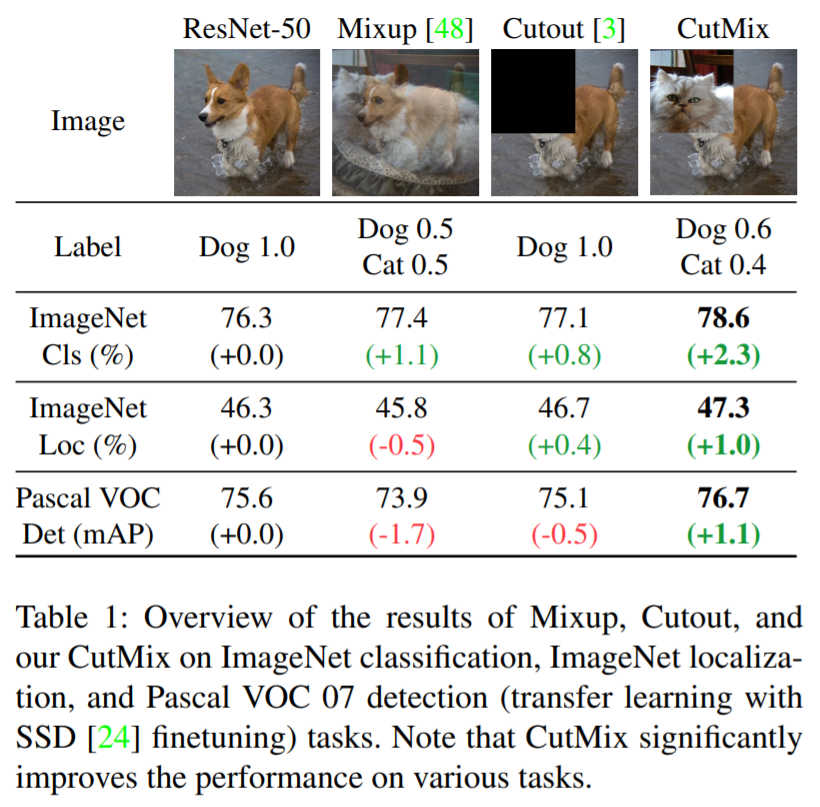

위의 Table 1에 나온 그림과 같이 **cutmix는 단순히 이미지의 특정 부분을 제거하는 것이 아니라 제거된 영역을 다른 이미지로 부터 가져온 patch로 대처**한다. 덕분에 regional dropout과 같이 보다 덜 특징적인 부분을 고려함과 동시에 학습시에 유익하지 않는 pixel이 없다. 또한 물체의 부분적인 view만 보고 물체를 식별할 수 있게 함으로써 localization ability를 증대시킨다.

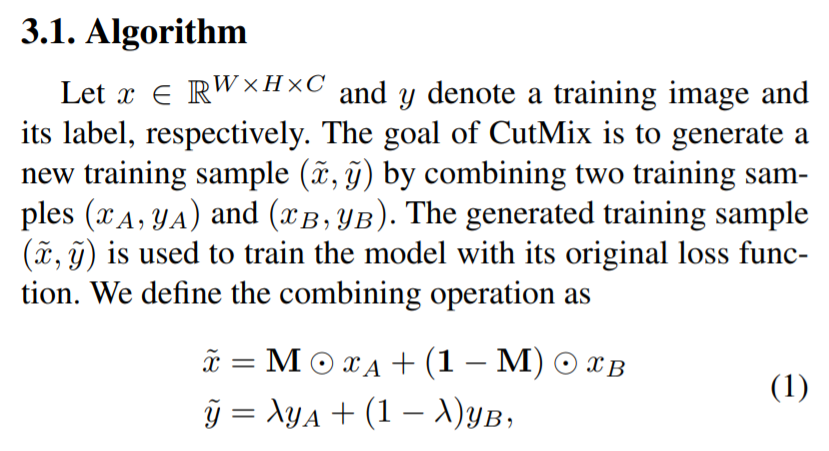

x(A)란 이미지와 x(B)라는 이미지가 있을때, x(A)의 특정 사각형 영역을 x(B)의 이미지로부터 값을 가져와 채워넣는 방식으로 이루어진다. 이때 label은 이미지의 각 sample이 차지는 비중으로 결정된다. (위 식에서 1 - λ가 바로 특정 사각형 영역의 비율이다.)

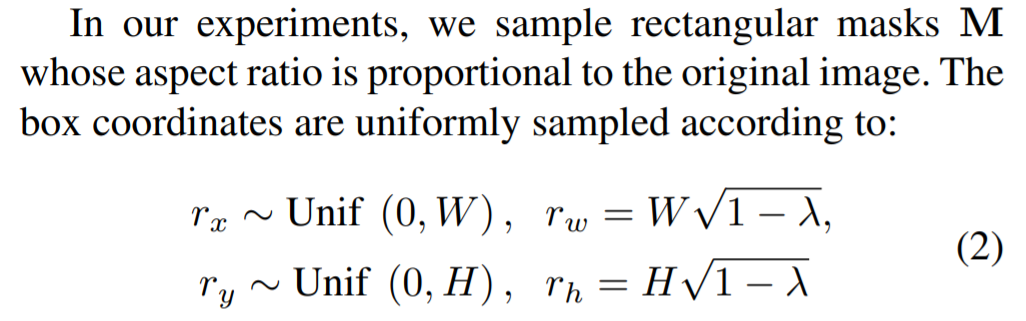

λ는 beta분포에서 sampling이 되는데, 논문의 저자는 모든 실험에서 alpha를 1로 정함으로써 0과 1이의 uniform distribution에서 λ값을 sampling하였다.

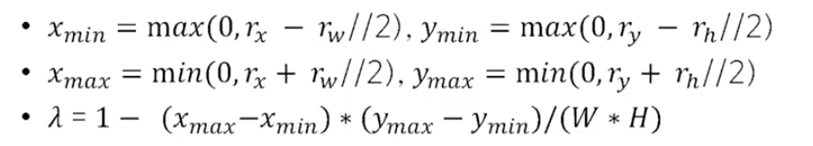

다음 binary mask를 sampling하기 위하여 bounding box의 좌표를 sampling했다. 이때 bounding box의 좌표를 **(r(x), r(y), r(w), r(h))**로 이루어지며 uniform distribution에서 sampling하게 된다. r(x)와 r(y)는 각각 bounding box의 중심 x좌표, y좌표를 나타낸다. 만일 bounding box가 이미지 밖으로 벗어날 경우 clipping을 하게 되며 이 경우는 전체 면적 대비 croping되는 면적의 비율을 다시 계산해줘야 한다.

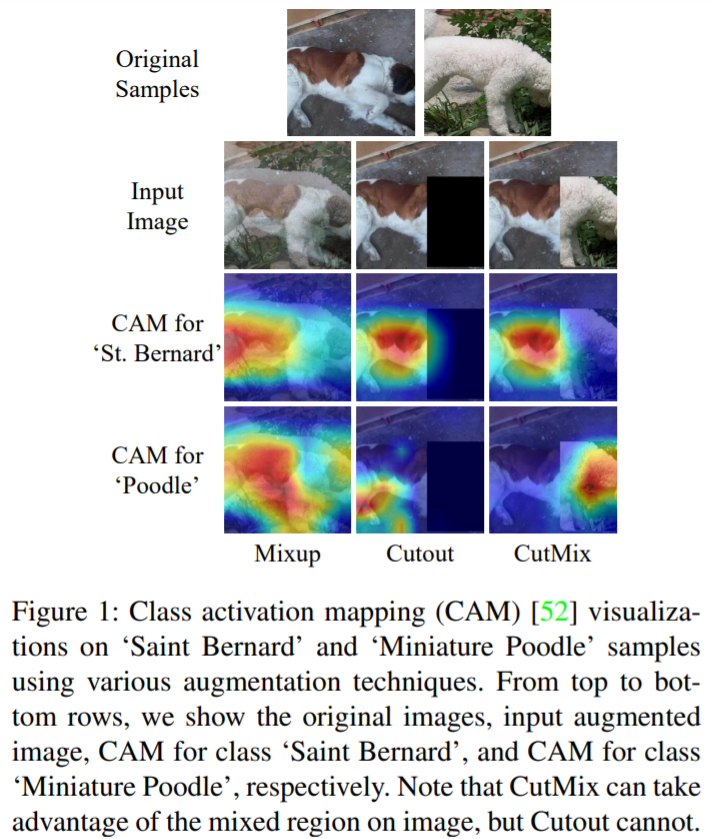

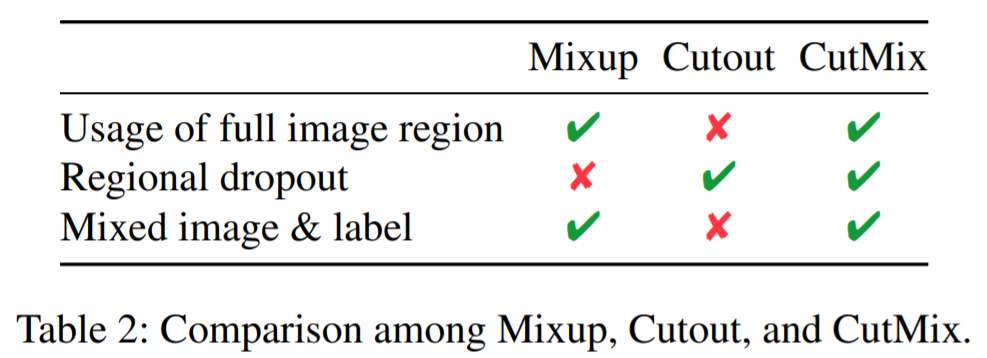

위의 그림 Figure 1은 cutmix가 각각의 부분적인 view만으로도 어떻게 인식하는지를 확인하기 위해 **CAM(class activation mapping)**을 통해 Mixup, Cutout, CutMix를 비교한 그림이다. 위의 표 Table 2를 동시에 보면 알 수 있듯이 cutmix는 하나의 이미지에서 두개의 물체가 부분적인 view만 가지고도 인식될 수 있게 하면서 물체의 전체가 classification의 단서로 활용될 수 있게끔 한다. cutout의 경우는 'St.Bernard'와 같이 덜 특징적인 부분에 잘 집중할 수 있다. 하지만 cutout된 region의 pixel을 사용하지 않으므로 비효율적인 단점이 있다. Mixup은 모든 region의 pixel을 사용함으로써 부자연스러운 이미지가 만들어지게 되므로 그 결과로 cam을 보면 물체를 인식할때 어떤 부분을 단서로 삼아야할지 혼란스러워 하는 단점이 있다.

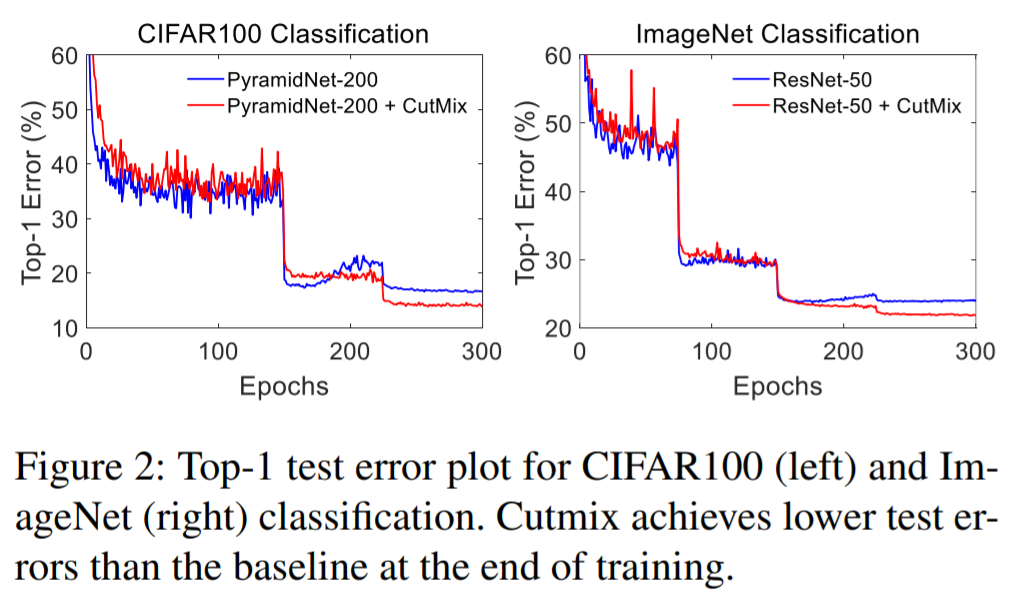

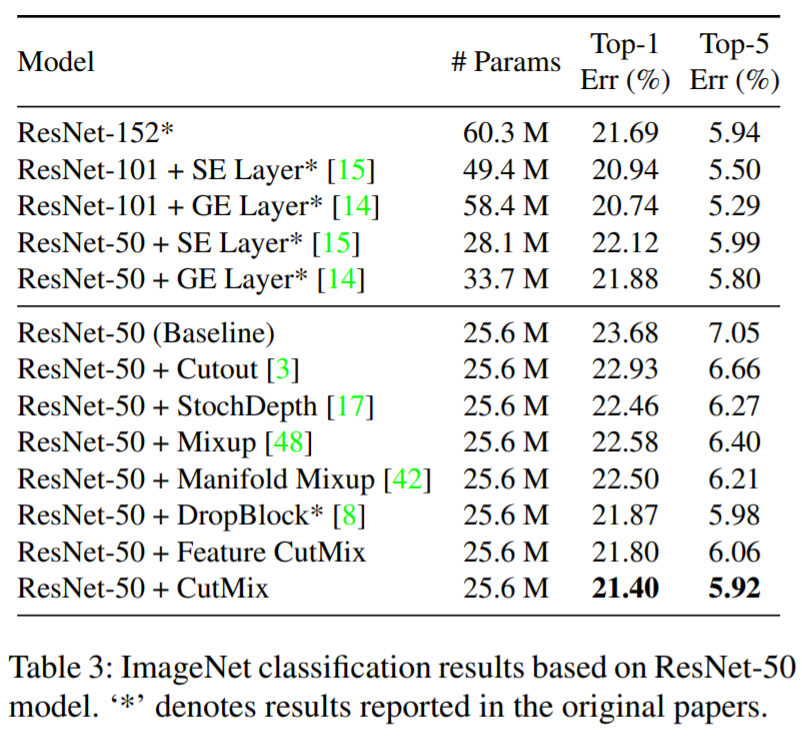

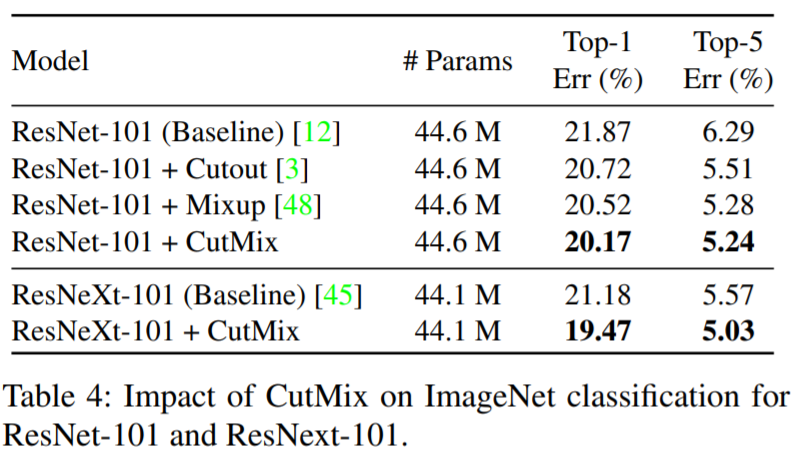

위의 표 Table 2~4를 통해 PyramidNet과 ResNet를 통한 실험 결과를 볼 수 있다. 이 실험을 통해 cutmix가 기존의 다른 방법들보다 더 좋은 성능을 낸다는 것을 확인할 수 있다.

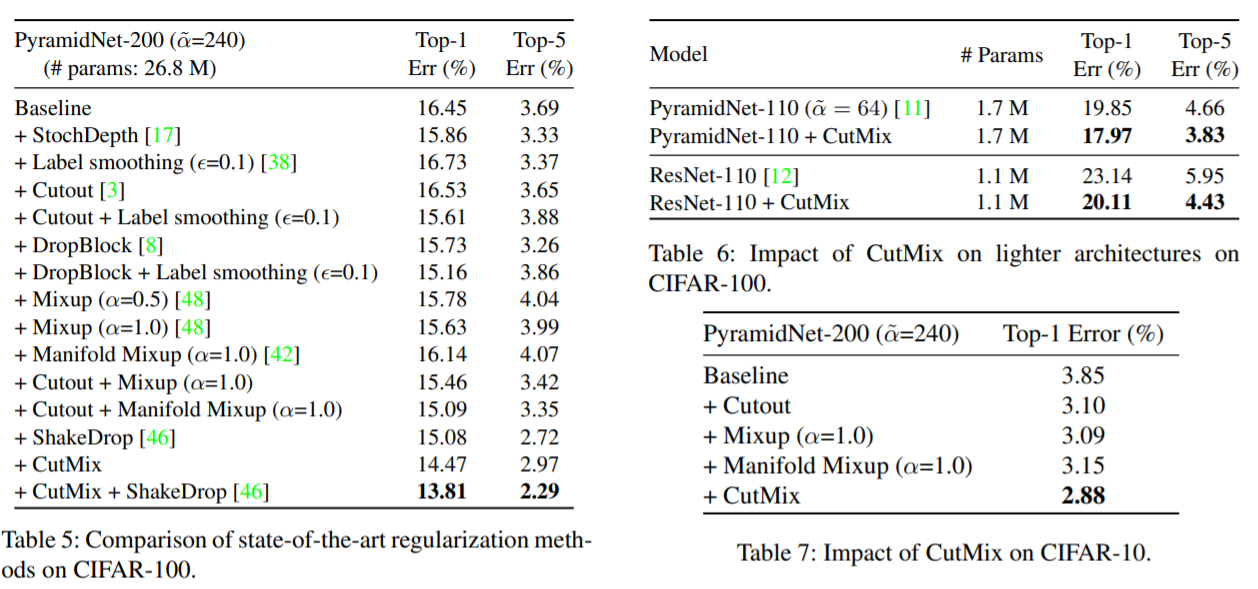

위의 표 Table 5~7은 PyramideNet에 다양한 regularization methods를 적용한 것이다. CutMix와 ShakeDrop을 같이 적용하는 것을 제외하면 CutMix가 제일 좋은 성능을 내는 것을 알 수 있다.

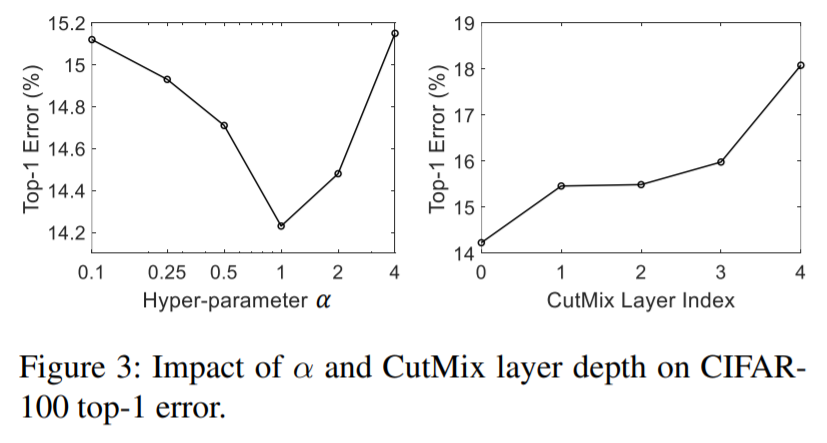

위의 그림 Figure 3에서 먼저 왼쪽을 보면 Hyper-parameter α가 cutmix에 어떤 영향을 미치는지 확인할 수 있다. α값의 경우 1일때가 최적의 값인 것을 확인할 수 있다. 오른쪽을 보면 Layer index가 0인 즉, image space에서 cutmix를 적용할때 가장 좋은 성능을 보이는 것을 알 수 있다.

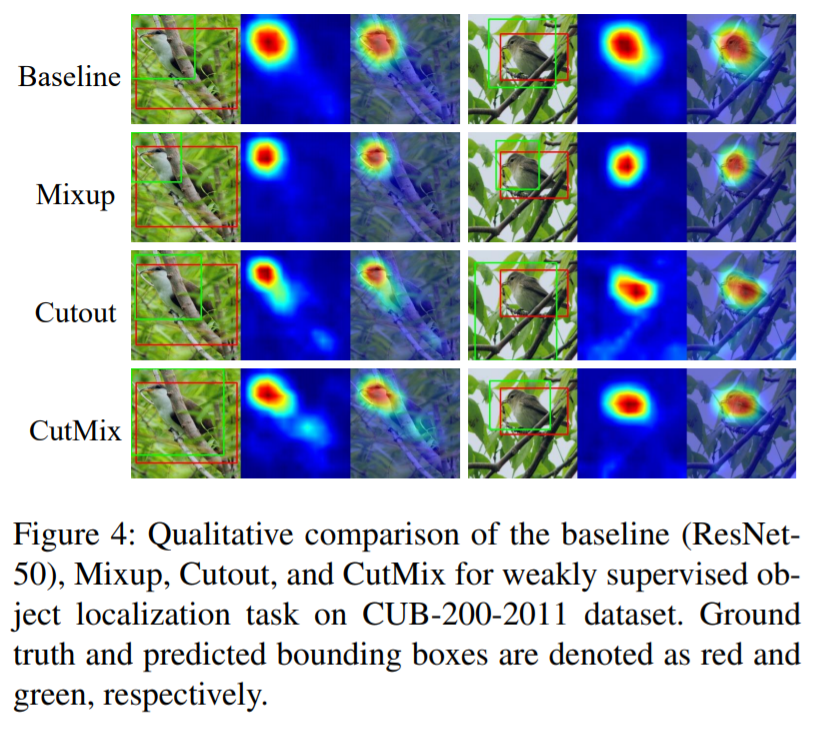

위의 그림 Figure 4는 WSOL(Weakly Supervised Object Localization)에서 cutmix의 성능을 CAM을 통해 나타낸 것이다. 위의 그림에서 빨간 box는 ground truth이며, 초록 box는 predicted bounding box이다. CutMix가 Baseline, Mixup이나 Cutout보다 물체를 더욱 잘 localization하는 것을 확인할 수 있다.

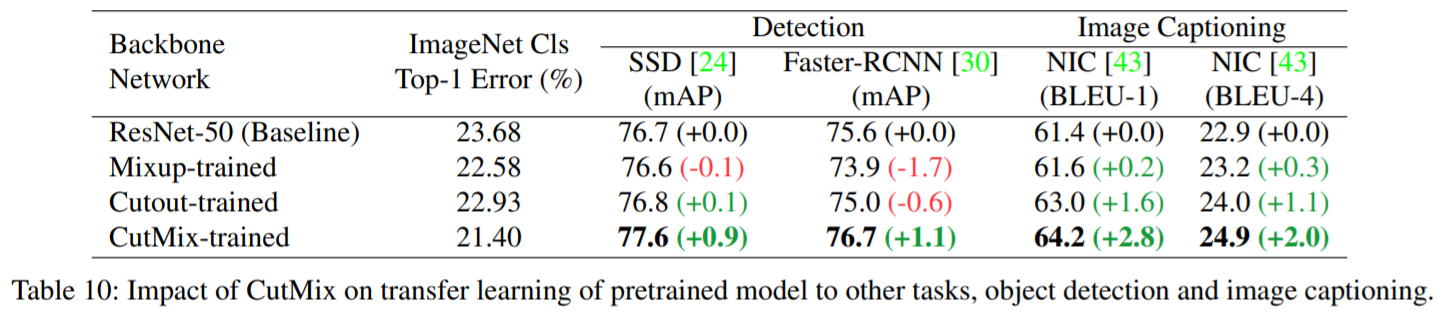

위의 표 Table 10은 transfer learning에 대해 나와있는데 이 경우 cutout이나 mixup의 경우 object detection에서 오히려 성능이 떨어지는 경우도 있는 반면 cutmix는 모두에서 성능 향상이 이루어지는 것을 확인할 수 있다. 그리고 Image Captioning에서도 뚜렷한 성능을 보이는 것을 확인할 수 있다.

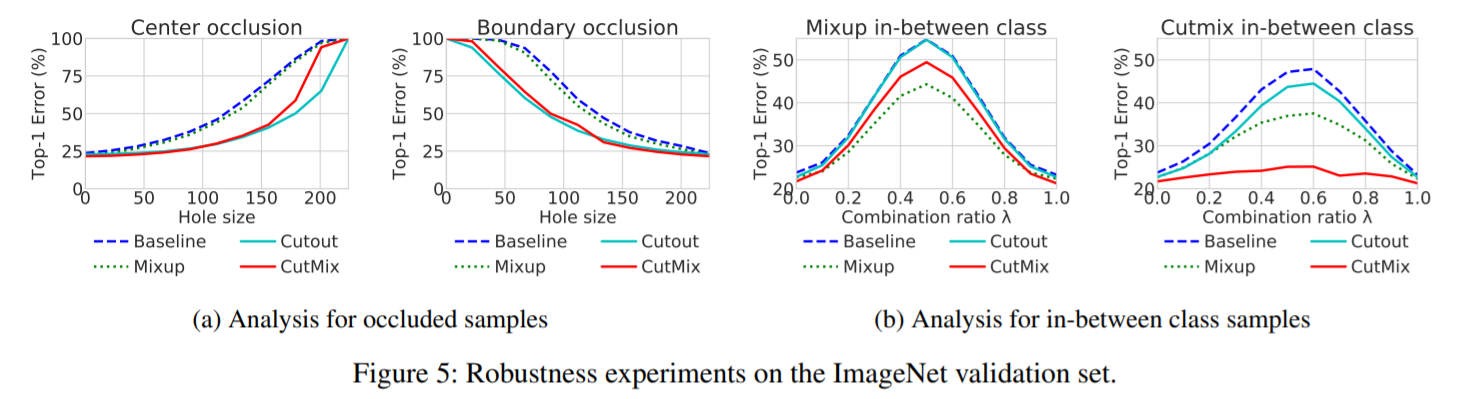

또한 위의 그림 Figure 5를 보면 CutMix가 occlusion sample이나 in-between class sample에 대해서도 다른 방법들이 비해 더욱 Robustness한 성능을 보인다.

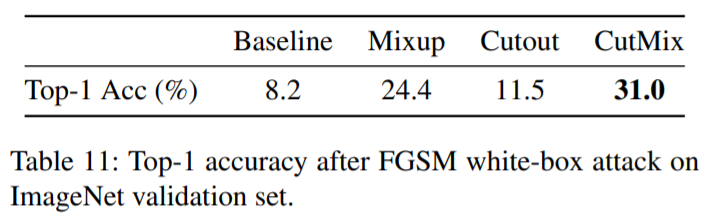

뿐만 아니라 위의 표 Table 11을 보면 FGSM에 대해서도 다른 모델에 비해 뛰어난 성능을 보인다.

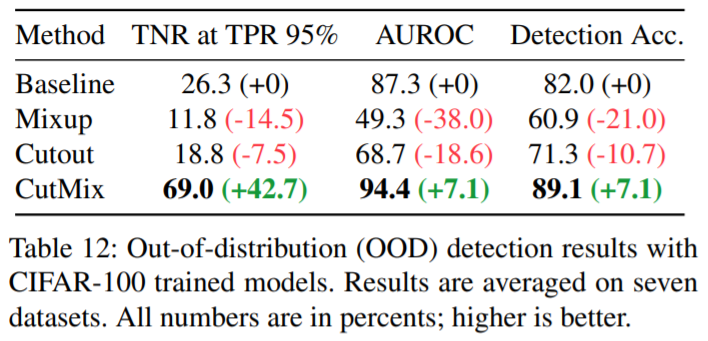

마지막으로 위의 표 Table 12는 Uncertainty에 대해 나와있는데, 이를 통해 OOD(Out-of-distribution)에서도 뛰어난 성능을 보이는 것을 알 수 있다.

## **Pytorch**

마지막으로 아래의 코드는 CutMix를 python으로 구현한 코드이다.

In [1]:
import numpy as np
import torch
import torch.nn as nn


def cutmix(batch, alpha):
    data, targets = batch

    indices = torch.randperm(data.size(0))
    shuffled_data = data[indices]
    shuffled_targets = targets[indices]

    lam = np.random.beta(alpha, alpha)

    image_h, image_w = data.shape[2:]
    cx = np.random.uniform(0, image_w)
    cy = np.random.uniform(0, image_h)
    w = image_w * np.sqrt(1 - lam)
    h = image_h * np.sqrt(1 - lam)
    x0 = int(np.round(max(cx - w / 2, 0)))
    x1 = int(np.round(min(cx + w / 2, image_w)))
    y0 = int(np.round(max(cy - h / 2, 0)))
    y1 = int(np.round(min(cy + h / 2, image_h)))

    data[:, :, y0:y1, x0:x1] = shuffled_data[:, :, y0:y1, x0:x1]
    targets = (targets, shuffled_targets, lam)

    return data, targets


class CutMixCollator:
    def __init__(self, alpha):
        self.alpha = alpha

    def __call__(self, batch):
        batch = torch.utils.data.dataloader.default_collate(batch)
        batch = cutmix(batch, self.alpha)
        return batch


class CutMixCriterion:
    def __init__(self, reduction):
        self.criterion = nn.CrossEntropyLoss(reduction=reduction)

    def __call__(self, preds, targets):
        targets1, targets2, lam = targets
        return lam * self.criterion(
            preds, targets1) + (1 - lam) * self.criterion(preds, targets2)